In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [3]:
data = load_diabetes()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


> ### 1. How are coefficients affected?
> As you increase the alpha value the `coefficients decreases and becomes 0`.

In [5]:
coefs = []
r2_scores = []
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

for i in [0.001,0.1,1,10]:
    reg = Lasso(alpha=i, max_iter=5000)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

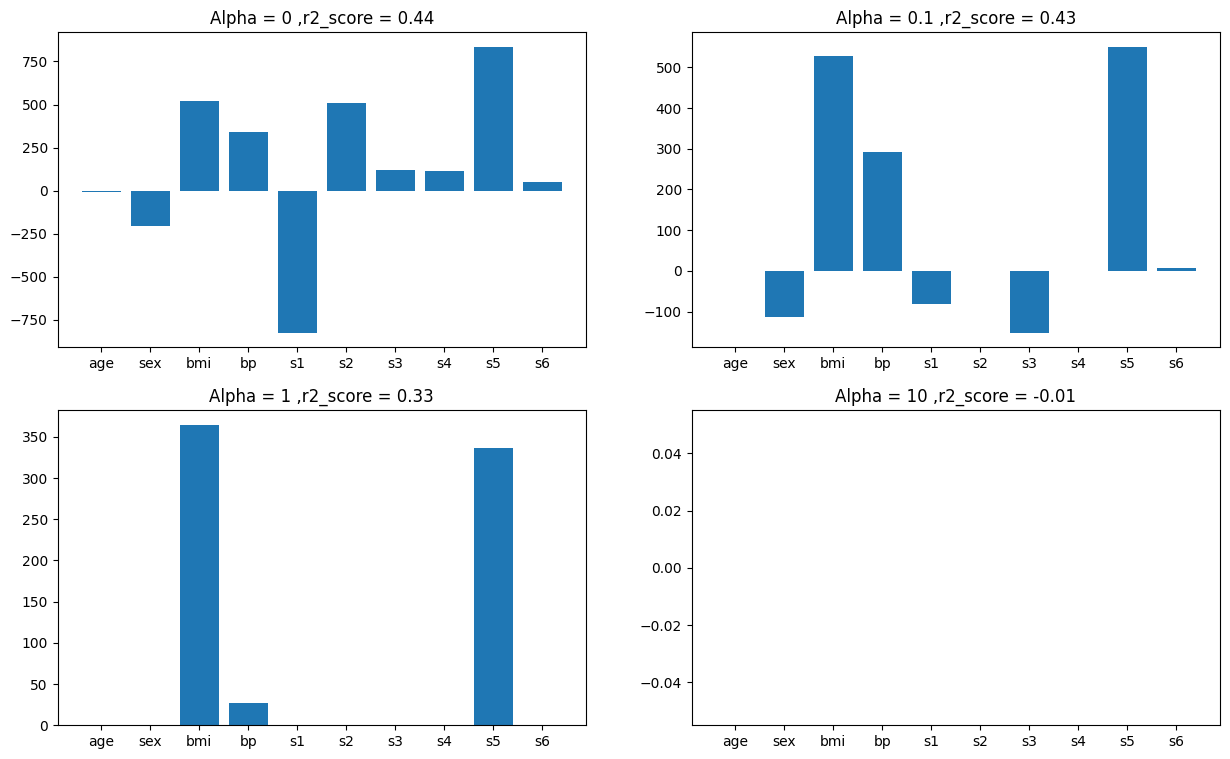

In [6]:
plt.figure(figsize=(15,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

<hr>

> ### 2. Higher Coefficients are affected more
> The rate of change of higher coefficients (-ve or +ve) is more than the smaller, but the smaller ones becomes 0 first

In [7]:
alphas = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [8]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
10000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [9]:
alphas = [0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

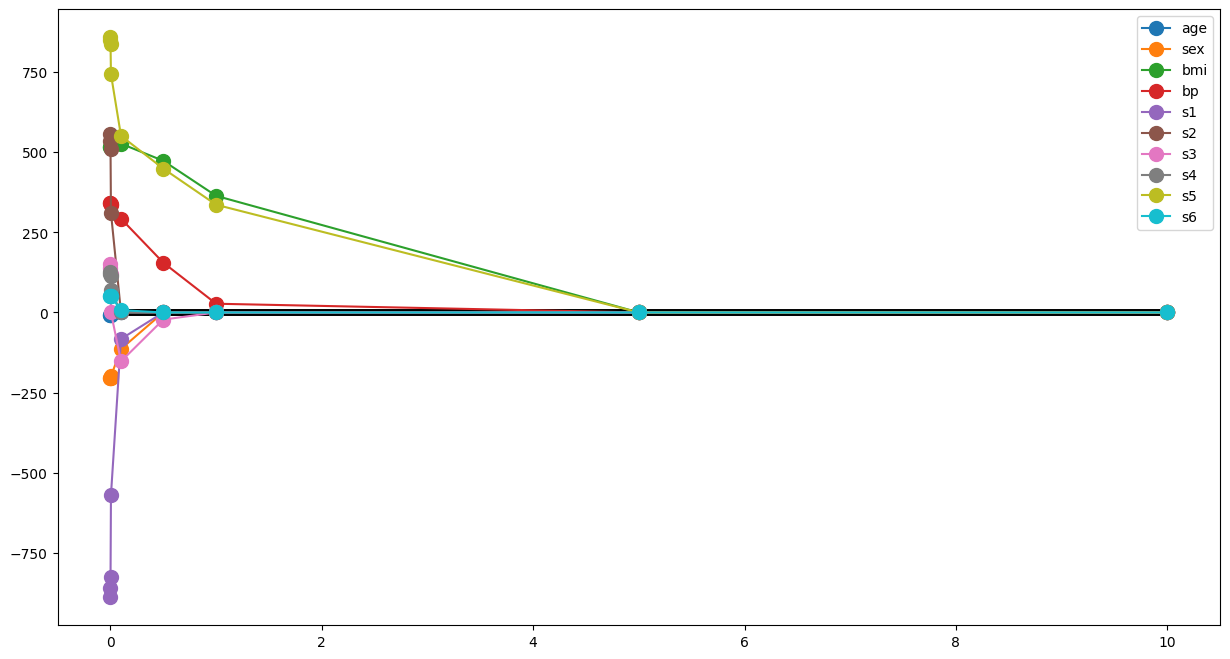

In [10]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i], marker = 'o', markersize=10)
plt.legend()

<hr>

> ### 3. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


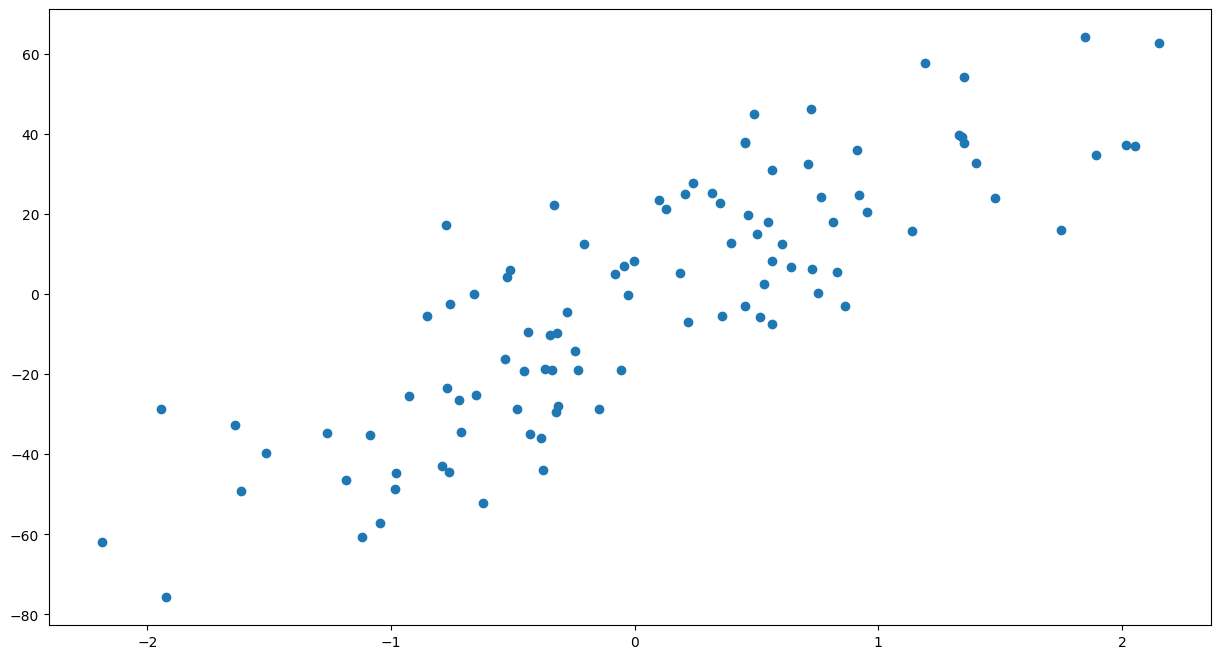

In [11]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.figure(figsize=(15,8))
plt.scatter(X,y)

reg = LinearRegression()
reg.fit(X,y)

print(reg.coef_)
print(reg.intercept_)

In [14]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + (alpha * np.abs(m))

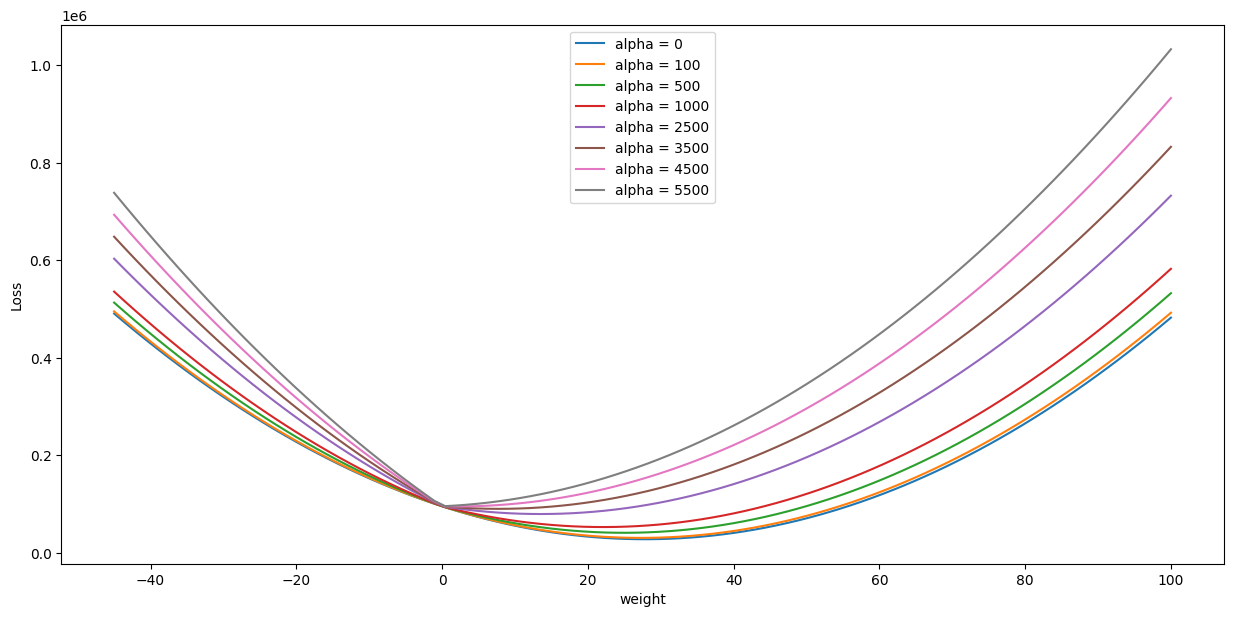

In [15]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(15, 7))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('weight')
plt.ylabel('Loss')
plt.show()

> 1. `Contour Lines of the Cost Function`:
> - When 𝛼 is small, the contour lines of the cost function are mostly determined by the error term, which forms a smooth bowl or ellipse shape (because of square terms).
> - As 𝛼 increases, the influence of the L1 penalty term 𝜆 ∣ 𝜃 ∣ becomes stronger, and the contours of the cost function start to be pulled into a diamond shape.
> 2. `Cost Function Minimization`:
> - At higher 𝛼, the optimization process moves from the elliptical contours to the diamond-shaped contours of the L1 penalty. 
> - The L1 penalty term introduces a sharp corner or "kink" at 𝜃 = 0. 
> 3. `Resulting Angle`: 
> - The diamond shape of the penalty term creates a situation where the optimization path has to align with the corners of the diamond. 
> - When you increase 𝛼, the constraints created by the L1 penalty force the coefficients to be exactly at the corners of the diamond (i.e., 𝜃 θ = 0 or non-zero non-zero). 
> 4. `Why Only at 𝜃 = 0`:
> - `The penalty term 𝜆 ∣ 𝜃 ∣ is non-differentiable at 𝜃 = 0`, which means that the optimization path creates an angle where the best choice for minimizing the cost function can be exactly at 𝜃 = 0 or on the boundary defined by the diamond.
> 5. As you increase the alpha, `the coefficient values becomes 0 and loss function becomes more and more dependent on intercept trem`